# Rede Neural para previsão de vazão de água de hidrelética

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Ecomp-Poli-UPE_logo.svg/1200px-Ecomp-Poli-UPE_logo.svg.png" alt="logo-poli-ecomp" width="500" height="250">

**Escola Politécnica de Pernambuco**

**Disciplina:** Redes Neurais

**Docente:** Meuser Valença

**Discentes:** Marcos Prudêncio, Eduardo Dubeux e Vinicyus Santos

**Recife, 2025**

## Definição do problema

## Preparação dos Dados

### Bibliotecas e Dataset

In [136]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale


In [137]:
# Lendo o dataset
df = pd.read_excel("Vazões_Diárias_1931_2016_RESUMIDA_FURNAS.xls")
df.head()

,Unnamed: 0,FURNAS (6)
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [138]:
# Dando nome as colunas
df.columns = ["data", "vazao"]
df.head()


,data,vazao
0,NaN,NaN
1,1/jan/1931,1996.0
2,2/jan/1931,1959.0
3,3/jan/1931,1937.0
4,4/jan/1931,1837.0


In [139]:
# Garantir que a coluna Data esteja no formato datetime para visualizacao
locale.setlocale(locale.LC_TIME, "pt_BR.UTF-8")

# Converter datas em formato "1/fev/1931"
df_view = df.copy()
df_view['Data'] = pd.to_datetime(df_view['data'], format="%d/%b/%Y", errors="coerce")

print(df)

              data    vazao
0              NaN      NaN
1       1/jan/1931  1996.00
2       2/jan/1931  1959.00
3       3/jan/1931  1937.00
4       4/jan/1931  1837.00
...            ...      ...
31408  27/dez/2016   548.79
31409  28/dez/2016   526.43
31410  29/dez/2016   519.20
31411  30/dez/2016   518.89
31412  31/dez/2016   498.37

[31413 rows x 2 columns]


### Análise Estatística

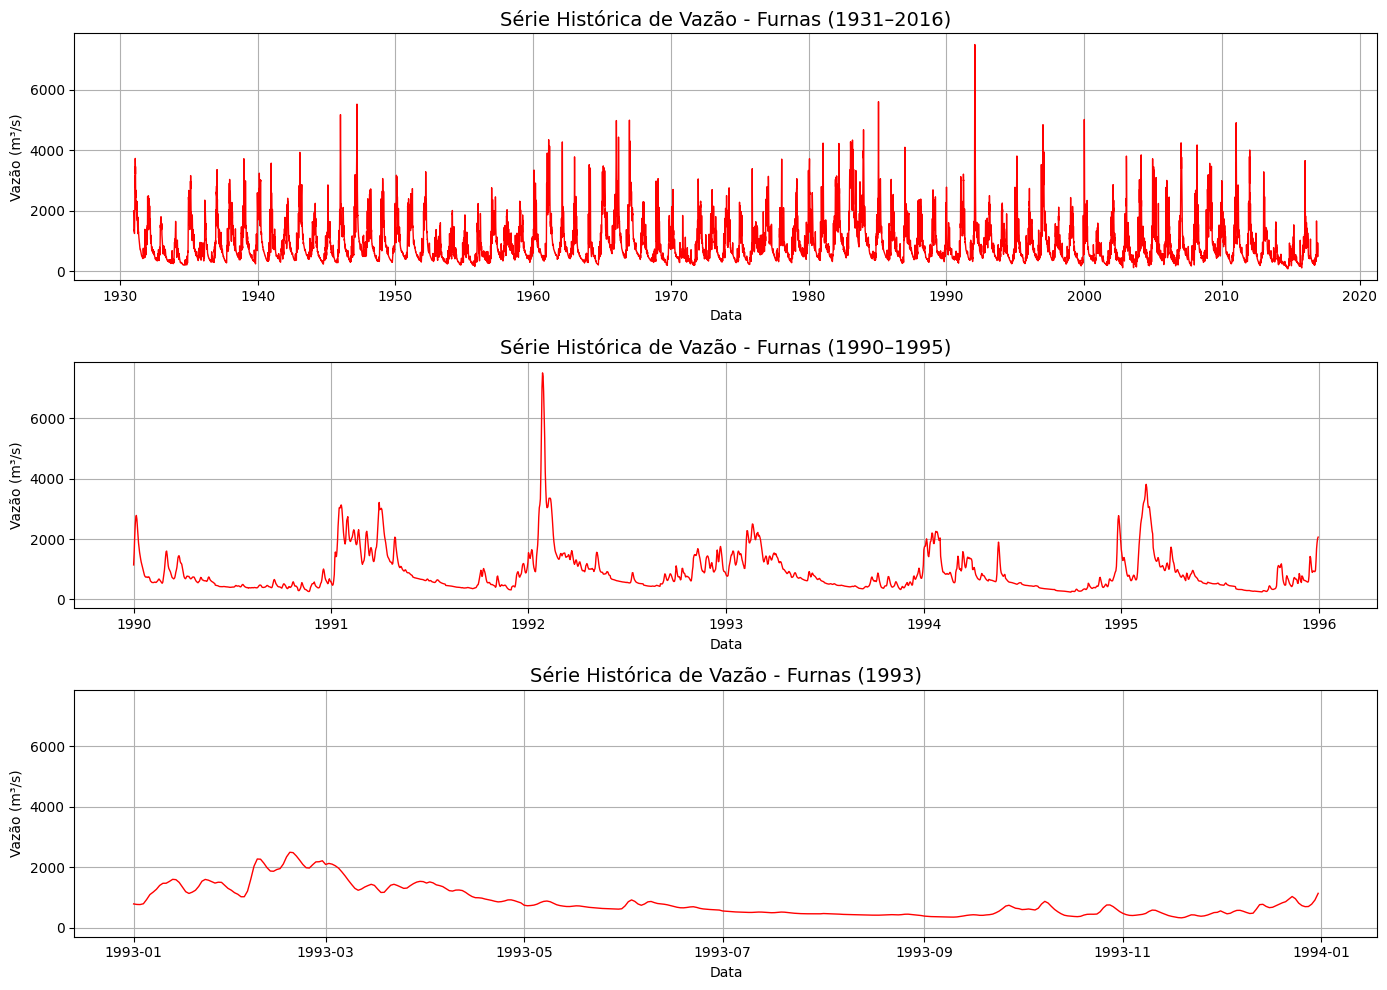

In [140]:

# Visualização geral e exemplo mais específico da série temporal
df_9095 = df_view[(df_view['Data'] >= "1990-01-01") & (df_view['Data'] <= "1995-12-31")]
df_93 = df_view[(df_view['Data'] >= "1993-01-01") & (df_view['Data'] <= "1993-12-31")]


fig, axes = plt.subplots(3, 1, figsize=(14,10), sharey=True)

axes[0].plot(df_view['Data'], df_view['vazao'], color='red', linewidth=1)
axes[0].set_title("Série Histórica de Vazão - Furnas (1931–2016)", fontsize=14)
axes[0].set_xlabel("Data")
axes[0].set_ylabel("Vazão (m³/s)")
axes[0].grid(True)

axes[1].plot(df_9095['Data'], df_9095['vazao'], color='red', linewidth=1)
axes[1].set_title("Série Histórica de Vazão - Furnas (1990–1995)", fontsize=14)
axes[1].set_xlabel("Data")
axes[1].set_ylabel("Vazão (m³/s)")
axes[1].grid(True)

axes[2].plot(df_93['Data'], df_93['vazao'], color='red', linewidth=1)
axes[2].set_title("Série Histórica de Vazão - Furnas (1993)", fontsize=14)
axes[2].set_xlabel("Data")
axes[2].set_ylabel("Vazão (m³/s)")
axes[2].grid(True)



plt.tight_layout()
plt.show()

📊 Estatísticas descritivas:
count    31412.000000
mean       906.478028
std        686.152601
min         75.000000
25%        447.705000
50%        665.000000
75%       1139.000000
max       7497.000000
Name: vazao, dtype: float64


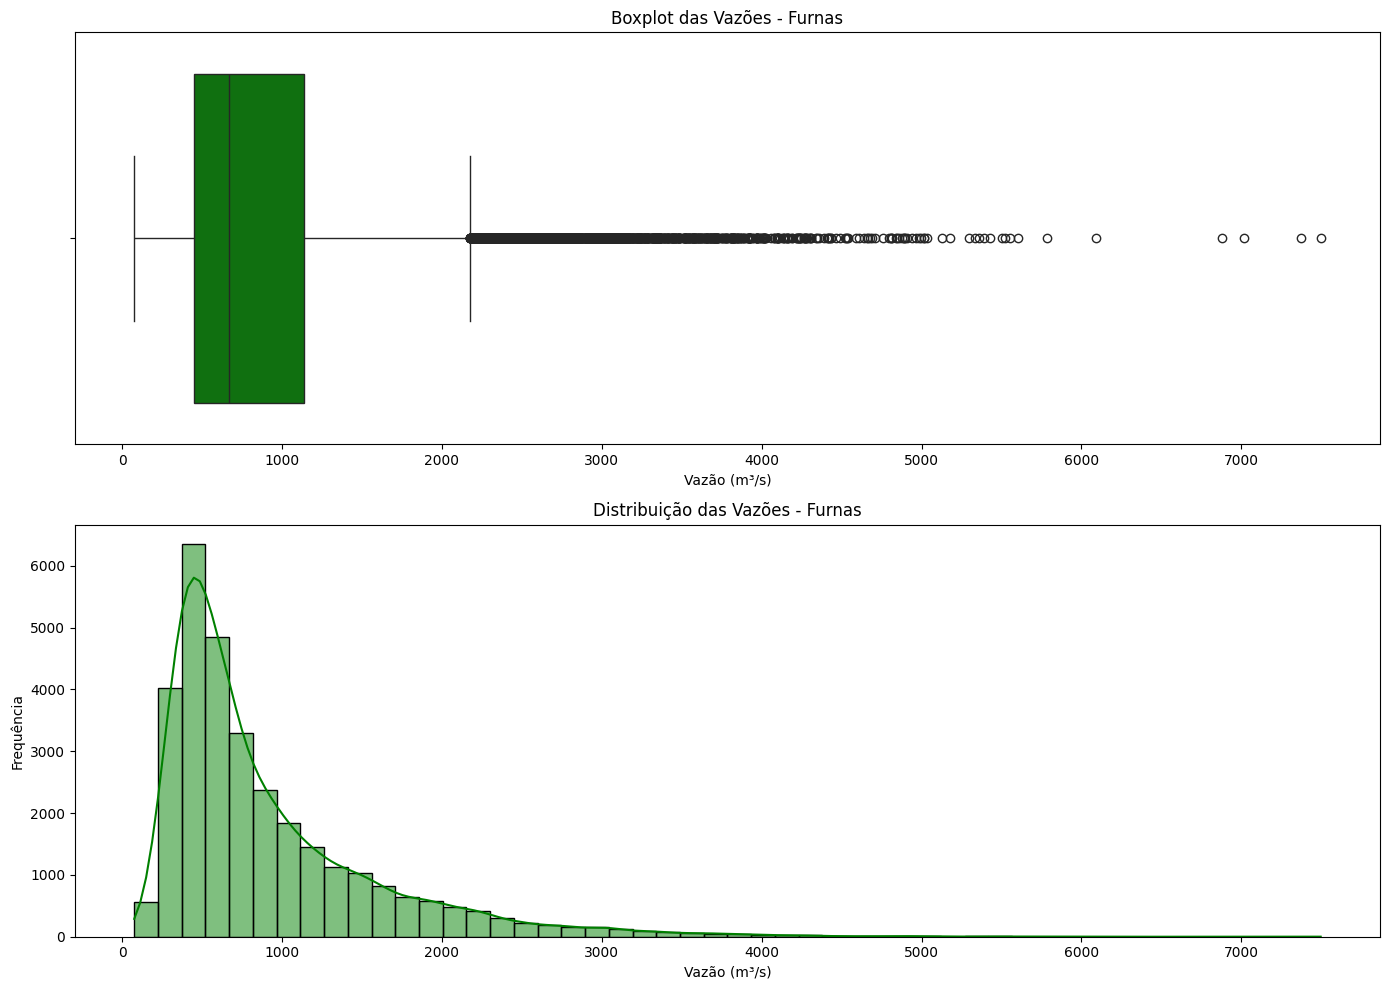

In [141]:
# Estatísticas descritivas
print("📊 Estatísticas descritivas:")
print(df['vazao'].describe())

# Boxplot + Histograma
fig, axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(x=df['vazao'], color="green", ax=axes[0])
axes[0].set_title("Boxplot das Vazões - Furnas")
axes[0].set_xlabel("Vazão (m³/s)")

sns.histplot(df['vazao'], bins=50, kde=True, color="green", ax=axes[1])
axes[1].set_title("Distribuição das Vazões - Furnas")
axes[1].set_xlabel("Vazão (m³/s)")
axes[1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()

In [142]:
df


,data,vazao
0,NaN,NaN
1,1/jan/1931,1996.00
2,2/jan/1931,1959.00
3,3/jan/1931,1937.00
4,4/jan/1931,1837.00
...,...,...
31408,27/dez/2016,548.79
31409,28/dez/2016,526.43
31410,29/dez/2016,519.20
31411,30/dez/2016,518.89


### Tratamento nulos e zeros

In [143]:
# Instâncias nulas
null = df['vazao'].isna().sum()

# Instâncias iguais a zero
zero = (df['vazao'] == 0).sum()

print(f" Valores nulos: {null}")
print(f" Valores iguais a zero: {zero}")

 Valores nulos: 1
 Valores iguais a zero: 0


In [144]:
# Remover valores nulos
df = df.dropna(subset=['vazao'])

null = df['vazao'].isna().sum()

print(f" Valores nulos: {null}")

 Valores nulos: 0


In [145]:
# ordenando os valores por data e definindo ela como índice
df['data'] = pd.to_datetime(df['data'], format='%d/%b/%Y')
#df.set_index(keys=['data'], drop=True, inplace=True)
df['data'] = pd.to_datetime(df['data'], errors='coerce')
# Definir a coluna 'data' como índice
df = df.set_index('data')
df.head()

C:\Users\prude\AppData\Local\Temp\ipykernel_6568\2051891656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], format='%d/%b/%Y')
C:\Users\prude\AppData\Local\Temp\ipykernel_6568\2051891656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data'] = pd.to_datetime(df['data'], errors='coerce')


,vazao
data,
1931-01-01,1996.0
1931-01-02,1959.0
1931-01-03,1937.0
1931-01-04,1837.0
1931-01-05,1713.0


## Modelagem

In [146]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adagrad, RMSprop
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
import random



random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
keras.utils.set_random_seed(42)
keras.initializers.GlorotNormal(seed=42)
tf.data.experimental.enable_debug_mode()


# Deslocamento dos dados 15 pra esq 7 pra dir é apenas no 
# 

In [147]:

def ajustar_dados(dataset: pd.DataFrame, n_entradas: int, qntd_saida=7):
    """
    Ajusta dataset para formato de janelas deslizantes.
    Agora inclui coluna 'data_inicio' para facilitar filtragem.
    """
    qntd_valores = dataset.shape[0]
    tam_amostra = n_entradas + qntd_saida

    dict_df = {'data_inicio': [], 'periodo': []}

    # Criar colunas para dias
    for i in range(-n_entradas + 1, qntd_saida + 1):
        dict_df[f'dia {i}'] = []

    # Gerar todas as janelas possíveis
    for i in range(qntd_valores - tam_amostra + 1):
        # ✅ CORRIGIDO: pegar data do índice ou da coluna
        if 'data' in dataset.columns:
            data_inicio = dataset['data'].iloc[i]
        else:
            data_inicio = dataset.index[i]
        
        dict_df['data_inicio'].append(data_inicio)
        
        # Período (para referência visual)
        inicio_str = dataset.index[i]
        fim_str = dataset.index[i + tam_amostra - 1]
        dict_df['periodo'].append(f'{inicio_str} - {fim_str}')
        
        # Valores de vazão
        for j, key in enumerate(list(dict_df.keys())[2:]):
            vazao = dataset['vazao'].iloc[i + j]
            dict_df[key].append(vazao)

    df_resultado = pd.DataFrame(dict_df)
    return df_resultado

In [195]:
from tensorflow.keras.initializers import GlorotUniform

def mlp_camadas(n_entradas, n_camadas, n_escondidas, otimizacao, n_saidas):

    init = GlorotUniform(seed=42)

    model = Sequential()
    # camada de entrada
    model.add(Input(shape=(n_entradas,)))

    # camadas intermediárias adicionais, se houver
    for _ in range(n_camadas):
        model.add(Dense(n_escondidas, activation='relu', kernel_initializer=init))

    # camada de saída (linear para regressão)
    model.add(Dense(n_saidas, activation='linear', kernel_initializer=init))

    model.add(Dropout(0.1))

    model.compile(optimizer=otimizacao, loss='mse', metrics=['mae'])
    return model


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error 
 


def avaliar_modelo(model, X_val, y_val, scaler_y=None, verbose=False):
    """
    Avalia o modelo em um conjunto de validação/teste.
    Retorna MSE, MAE, RMSE, R2 e EPMA.
    """
    # Converter tensores para numpy se necessário
    if isinstance(y_val, tf.Tensor):
        y_val = tf.make_ndarray(y_val)
    if isinstance(X_val, tf.Tensor):
        X_val = tf.make_ndarray(X_val)

    # Predição
    y_pred = model.predict(X_val, verbose=0)

    # Reverter normalização (mantendo o formato correto)
    if scaler_y is not None:
        if y_pred.ndim == 1:
            y_pred = y_pred.reshape(-1, 1)
        if y_val.ndim == 1:
            y_val = y_val.reshape(-1, 1)

        y_pred = scaler_y.inverse_transform(y_pred)
        y_val = scaler_y.inverse_transform(y_val)

    # Achatar para métricas
    y_pred = y_pred.flatten()
    y_true = y_val.flatten()

    # Calcular métricas
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    if verbose:
        print(f"MSE : {mse:.4f}")
        print(f"MAE : {mae:.4f}")
        print(f"RMSE: {rmse:.4f}")
        print(f"R²  : {r2:.4f}")
        print(f"EPMA: {mape:.2f}%")

    return {
        "MSE": mse,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape
    }


import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ====================================================================
# PROBLEMA NA FUNÇÃO ORIGINAL
# ====================================================================
"""
PROBLEMA:
    y_pred = y_pred.flatten()  ← ISTO REMOVE A ESTRUTURA TEMPORAL
    y_true = y_val.flatten()
    
    Ao achatar, você está calculando:
    MAPE = mean(|erro| / |valor_real|) para TODOS os 7 dias juntos
    
    Isso causa:
    1. Perda de informação por horizonte
    2. MAPE artificialmente baixo (valores se compensam)
    3. Não reflete degradação temporal

SOLUÇÃO:
    Manter estrutura (n_samples, n_horizons) e calcular:
    - Métricas globais (opcional)
    - Métricas por horizonte (essencial!)
"""

# ====================================================================
# VERSÃO CORRIGIDA DA FUNÇÃO
# ====================================================================

def avaliar_modelo_corrigido(model, X_val, y_val, scaler_y=None, verbose=False):
    """
    Avalia o modelo calculando apenas o MAPE (Erro Percentual Absoluto Médio).
    Calcula tanto o MAPE global quanto o MAPE por horizonte (1 a 7 dias).
    """
    # Converter tensores para numpy, se necessário
    if isinstance(y_val, tf.Tensor):
        y_val = y_val.numpy()
    if isinstance(X_val, tf.Tensor):
        X_val = X_val.numpy()

    # Predição
    y_pred = model.predict(X_val, verbose=0)

    # Garantir formato 2D
    if y_pred.ndim == 1:
        y_pred = y_pred.reshape(-1, 1)
    if y_val.ndim == 1:
        y_val = y_val.reshape(-1, 1)

    # Reverter normalização, se houver
    if scaler_y is not None:
        y_pred = scaler_y.inverse_transform(y_pred)
        y_val = scaler_y.inverse_transform(y_val)

    n_samples, n_horizons = y_val.shape

    # ================================================================
    # MAPE GLOBAL
    # ================================================================
    y_pred_flat = y_pred.flatten()
    y_true_flat = y_val.flatten()

    mask = y_true_flat != 0
    mape_global = np.mean(np.abs((y_true_flat[mask] - y_pred_flat[mask]) / y_true_flat[mask])) * 100 if mask.sum() > 0 else np.nan

    # ================================================================
    # MAPE POR HORIZONTE
    # ================================================================
    metricas_por_horizonte = {}
    for h in range(n_horizons):
        y_true_h, y_pred_h = y_val[:, h], y_pred[:, h]
        mask_h = y_true_h != 0
        mape_h = np.mean(np.abs((y_true_h[mask_h] - y_pred_h[mask_h]) / y_true_h[mask_h])) * 100 if mask_h.sum() > 0 else np.nan
        metricas_por_horizonte[f'dia_{h+1}'] = mape_h

    mape_medio = np.nanmean(list(metricas_por_horizonte.values()))

    # ================================================================
    # EXIBIÇÃO
    # ================================================================
    if verbose:
        print("="*50)
        print(f"MAPE GLOBAL : {mape_global:.2f}%")
        print("="*50)
        print("MAPE POR HORIZONTE (dias à frente)")
        print("="*50)
        for dia, mape in metricas_por_horizonte.items():
            print(f"  +{dia.split('_')[1]} dia(s): {mape:.2f}%")
        print("-" * 50)
        print(f"MAPE MÉDIO : {mape_medio:.2f}%")
        print("="*50)

    return {
        "MAPE_global": mape_global,
        "MAPE_medio": mape_medio,
        "MAPE_por_horizonte": metricas_por_horizonte
    }



## Treinar e testar com diferentes entradas e neuronios nas camadas escondidas

melhor modelo geral - média e desvio padrão

In [229]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit


def cross_val_time_series_single_2(
    df,
    otimizacao,
    n_entradas,
    n_camadas,
    n_escondidas,
    n_splits=5,
    n_saidas=7,
    epochs=100,
    batch_size=32
):
    """
    Realiza validação cruzada temporal completa com TimeSeriesSplit
    para um único tamanho de janela (n_entradas).

    Args:
        df (pd.DataFrame): Dataset base.
        n_entradas (int): Tamanho da janela de entrada (ex: 15, 30, 45).
        n_splits (int): Número de divisões na validação cruzada temporal.
        n_camadas (int): Número de camadas ocultas no MLP.
        n_escondidas (int): Número de neurônios em cada camada oculta.
        otimizacao: Otimizador (ex: Adagrad()).
        n_saidas (int): Número de saídas previstas.
        epochs (int): Número de épocas de treino.
        batch_size (int): Tamanho do batch.

    Returns:
        pd.DataFrame: Resultados consolidados com métricas por fold.
    """
    
    df_treino_val = df[df.index.year <= 2010].copy()

    resultados_folds = []

    # Gerar dataset ajustado (função já existente)
    df_n = ajustar_dados(df_treino_val, n_entradas)
    
    # Colunas de entrada e saída
    col_x = [f"dia {i}" for i in range(-(n_entradas - 1), 1)]
    col_y = [f"dia {i}" for i in range(1, n_saidas + 1)]

    X = df_n[col_x].values
    y = df_n[col_y].values

    # Normalização
    scaler_X = MinMaxScaler()
    scaler_y = MinMaxScaler()
    X_norm = scaler_X.fit_transform(X)
    y_norm = scaler_y.fit_transform(y)

    # Validação cruzada temporal
    tscv = TimeSeriesSplit(n_splits=n_splits)

    for fold, (train_idx, val_idx) in enumerate(tscv.split(X_norm)):
        print(f"Fold {fold + 1}/{n_splits} — entradas: {n_entradas}")

        X_train, X_val = X_norm[train_idx], X_norm[val_idx]
        y_train, y_val = y_norm[train_idx], y_norm[val_idx]

        otimizador_novo = RMSprop(learning_rate=0.0001)

        # Criar e treinar modelo
        model = mlp_camadas(n_entradas, n_camadas, n_escondidas, otimizador_novo, n_saidas=n_saidas)

        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=20,          # para se não melhorar por 10 épocas
            restore_best_weights=True,
            verbose=0
        )
        
        model.fit(
            X_train, y_train,
            validation_data=(X_val, y_val),
            epochs=epochs,
            batch_size=batch_size,
            shuffle=False,
            verbose=0,
            callbacks=[early_stop]

    
        )
        # Avaliar
        metricas = avaliar_modelo_corrigido(model, X_val, y_val, scaler_y)
        metricas['Fold'] = fold + 1
        resultados_folds.append(metricas)

    
    return resultados_folds

resultados = []

# hiperparâmetros
entradas = [15, 30, 60]
camadas = [1, 2]
neuronios = [20, 40, 60]
otimizadores = {
    #'Adagrad': Adagrad(learning_rate=0.1),
    'RMSprop': RMSprop(learning_rate=0.0001)
}

# loop geral
for nome_opt, opt in otimizadores.items():
    for n_entradas in entradas:
        for n_camadas in camadas:
            for n_escondidas in neuronios:
                
                tf.keras.utils.set_random_seed(42)
                
                print(f"Treinando: Entradas={n_entradas}, Camadas={n_camadas}, "
                      f"Neurônios={n_escondidas}, Otimizador={nome_opt}")

                # chama a função principal de validação cruzada
                resultados_exp = cross_val_time_series_single_2(
                    df,
                    n_entradas=n_entradas,
                    n_camadas=n_camadas,
                    n_escondidas=n_escondidas,
                    otimizacao=opt
                )

                # Se for lista de dicionários, tira a média ou pega o primeiro
                if isinstance(resultados_exp, list):
                    df_fold = pd.DataFrame(resultados_exp)
                    mape_medio = df_fold['MAPE'].mean()
                    desvio_mape = df_fold['MAPE'].std()
                else:
                    mape_medio = resultados_exp.get('MAPE', np.nan)
                    desvio_mape = np.nan

                resultados.append({
                    "entradas": n_entradas,
                    "camadas": n_camadas,
                    "neurônios": n_escondidas,
                    "otimizador": nome_opt,
                    "MAPE_médio": mape_medio,
                    "Desvio_MAPE": desvio_mape
                })


# converte para dataframe
df_resultados = pd.DataFrame(resultados)

# Encontrar o melhor modelo: menor MAPE médio, e em caso de empate, menor desvio padrão
melhor_modelo = df_resultados.sort_values(
    by=["MAPE_médio", "Desvio_MAPE"], ascending=[True, True]
).iloc[0]

# Exibir resultados
print("\n MELHOR MODELO ENCONTRADO")
print(f"Entradas: {melhor_modelo['entradas']}")
print(f"Camadas: {melhor_modelo['camadas']}")
print(f"Neurônios: {melhor_modelo['neurônios']}")
print(f"Otimizador: {melhor_modelo['otimizador']}")
print(f"MAPE Médio: {melhor_modelo['MAPE_médio']:.4f}")
print(f"Desvio Padrão do MAPE: {melhor_modelo['Desvio_MAPE']:.4f}")

print("\n📊 Top 10 Modelos com Menor MAPE Médio:")
display(df_resultados.sort_values(by=['MAPE_médio', 'Desvio_MAPE']).head(10))

Treinando: Entradas=15, Camadas=1, Neurônios=20, Otimizador=RMSprop
Fold 1/5 — entradas: 15
Fold 2/5 — entradas: 15
Fold 3/5 — entradas: 15
Fold 4/5 — entradas: 15
Fold 5/5 — entradas: 15


KeyError: 'MAPE'

In [231]:
# Separar treino e teste corretamente
df_treino = df[df.index.year <= 2010].copy()
df_teste  = df[df.index.year > 2010].copy()

df_train_prep = ajustar_dados(df_treino, n_entradas=15)
df_test_prep  = ajustar_dados(df_teste, n_entradas=15)

# Definir colunas de entrada e saída
col_x = [f"dia {i}" for i in range(-14, 1)]
col_y = [f"dia {i}" for i in range(1, 8)]


# Separar variáveis
X_train, y_train = df_train_prep[col_x].values, df_train_prep[col_y].values
X_test,  y_test  = df_test_prep[col_x].values,  df_test_prep[col_y].values


# Normalização
scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
X_train_n = scaler_X.fit_transform(X_train)
y_train_n = scaler_y.fit_transform(y_train)
X_test_n  = scaler_X.transform(X_test)
y_test_n  = scaler_y.transform(y_test)


# Reconfigurar seed
tf.keras.utils.set_random_seed(42)

# Criar modelo final com hiperparâmetros escolhidos
model_final = mlp_camadas(
    n_entradas=15,   # deve ser igual ao usado em ajustar_dados
    n_camadas=1,
    n_escondidas=40,
    otimizacao=RMSprop(learning_rate=0.0001),
    n_saidas=7
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=20,
    restore_best_weights=True,
    verbose=1
)


# Treinamento final
history = model_final.fit(
    X_train_n, y_train_n,
    validation_split=0.1,   # usa 10% do treino para validação
    epochs=100,
    batch_size=32,
    shuffle=False,
    verbose=1,
    callbacks=[early_stop]
)

# Avaliação no conjunto de teste final
#metricas_finais = avaliar_modelo(model_final, X_test_n, y_test_n, scaler_y, verbose=True)
metricas_finais = avaliar_modelo_corrigido(model_final, X_test_n, y_test_n, scaler_y, verbose=True)
metricas_finais['MAPE'] = metricas_finais['MAPE_medio']  # Compatibilidade
print("\nMétricas finais (dados de teste):")
print(metricas_finais)


Epoch 1/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0142 - mae: 0.0713 - val_loss: 0.0055 - val_mae: 0.0459
Epoch 2/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0054 - mae: 0.0464 - val_loss: 0.0041 - val_mae: 0.0380
Epoch 3/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0047 - mae: 0.0406 - val_loss: 0.0036 - val_mae: 0.0345
Epoch 4/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0043 - mae: 0.0377 - val_loss: 0.0034 - val_mae: 0.0327
Epoch 5/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0042 - mae: 0.0363 - val_loss: 0.0032 - val_mae: 0.0315
Epoch 6/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0041 - mae: 0.0352 - val_loss: 0.0031 - val_mae: 0.0306
Epoch 7/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0039 - mae: 0.0346 - val_loss: 0.0030 - val_mae: 0.0299
Epoch 8/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0039 - mae: 0.0339 - val_loss: 0.0029 - val_mae: 0.0294
Epoch 9/100
822/822 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/

In [ ]:
import seaborn as sns

# def grafico_linha_previsao_real(y_test, y_pred):
#     """Gráfico de linha: Previsão vs Real"""
#     y_test = y_test.flatten()
#     y_pred = y_pred.flatten()

#     plt.figure(figsize=(14, 6))
#     plt.plot(y_test, label='Real', linewidth=1.5, color='green'), 
#     plt.plot(y_pred, label='Previsto', linewidth=1.5, color = 'orange')
#     plt.title('Previsão vs Real (linha)')
#     plt.xlabel('Amostras')
#     plt.ylabel('Vazão')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

def grafico_linha_previsao_real(y_test, y_pred):
    y_real_continuo = y_test[:, 0]    # valor real de +1 dia à frente
    y_pred_continuo = y_pred[:, 0]  # previsão de +1 dia

    # Cria eixo temporal baseado no índice do dataset de teste
    datas_test = df_test_prep['data_inicio'].reset_index(drop=True)

    plt.figure(figsize=(14, 6))
    plt.plot(datas_test, y_real_continuo, label='Real', color='green', linewidth=1.5)
    plt.plot(datas_test, y_pred_continuo, label='Previsto', color='orange', linewidth=1.5)
    plt.title('Previsão vs Real (linha)')
    plt.xlabel("Data")
    plt.ylabel("Vazão (m³/s)")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()  
    

def grafico_dispersao(y_test, y_pred):
    """Gráfico de dispersão: Real vs Previsto"""
    y_test = y_test.flatten()
    y_pred = y_pred.flatten()

    plt.figure(figsize=(14, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Dispersão: Real vs Previsto')
    plt.xlabel('Valor Real')
    plt.ylabel('Valor Previsto')
    plt.grid(True)
    plt.show()

def grafico_erro_tempo(y_test, y_pred):
    """Gráfico do erro ao longo do tempo"""
    erros = y_test.flatten() - y_pred.flatten()

    plt.figure(figsize=(14, 6))
    plt.plot(erros, color='purple')
    plt.axhline(0, color='black', linestyle='--')
    plt.title('Erro ao longo do tempo')
    plt.xlabel('Amostras')
    plt.ylabel('Erro')
    plt.grid(True)
    plt.show()

def grafico_histograma_erros(y_test, y_pred):
    """Histograma da distribuição dos erros"""
    erros = y_test.flatten() - y_pred.flatten()

    plt.figure(figsize=(14, 6))
    sns.histplot(erros, kde=True, bins=30, color='skyblue')
    plt.title('Histograma dos Erros')
    plt.xlabel('Erro')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()



In [253]:
y_pred = model_final.predict(X_test_n, verbose=0)

y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test_n)


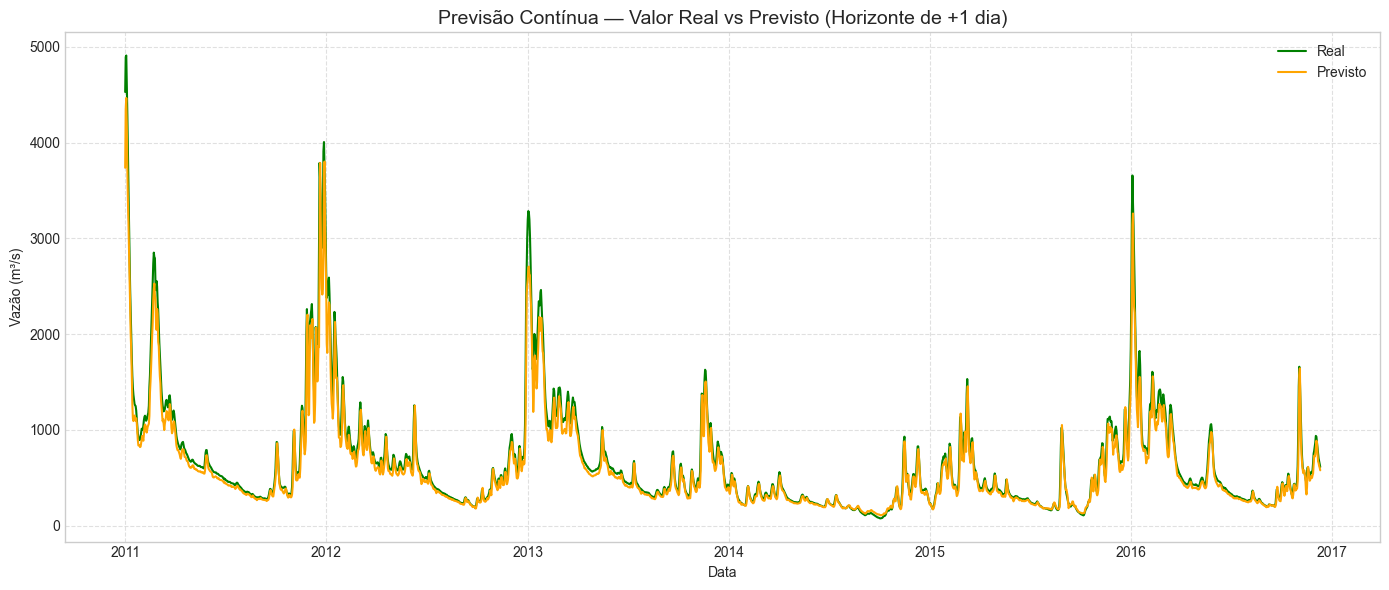

In [286]:

grafico_linha_previsao_real(y_test_original,y_pred_original)

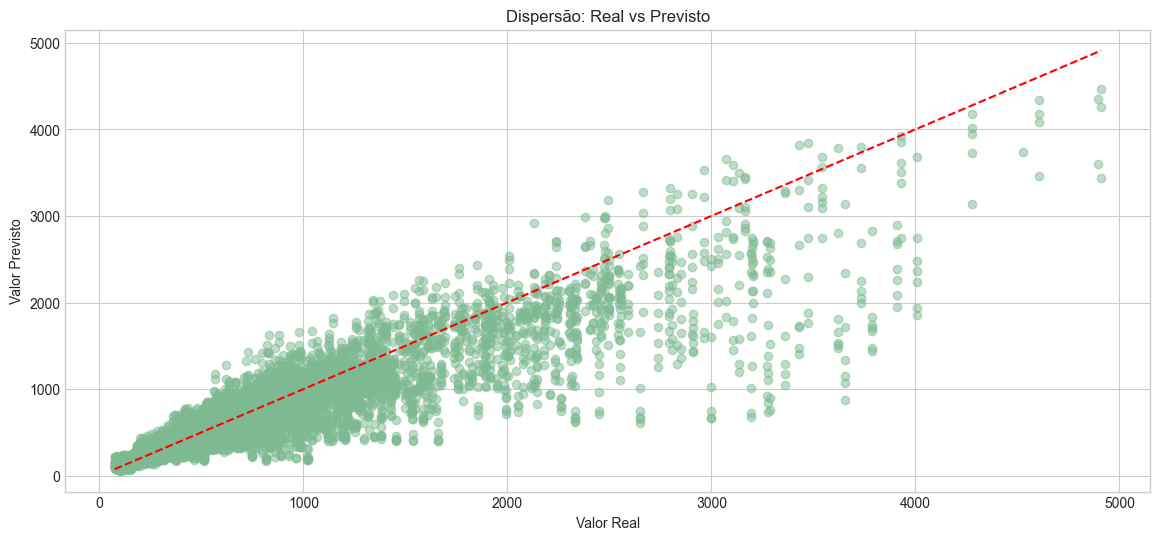

In [260]:
grafico_dispersao(y_test_original,y_pred_original)


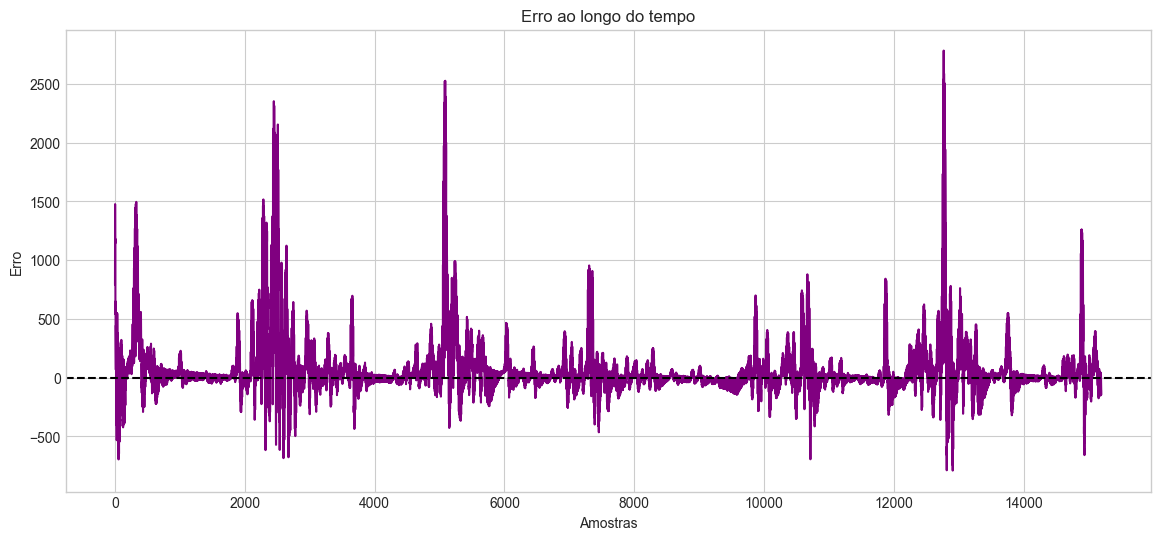

In [304]:
grafico_erro_tempo(y_test_original,y_pred_original)


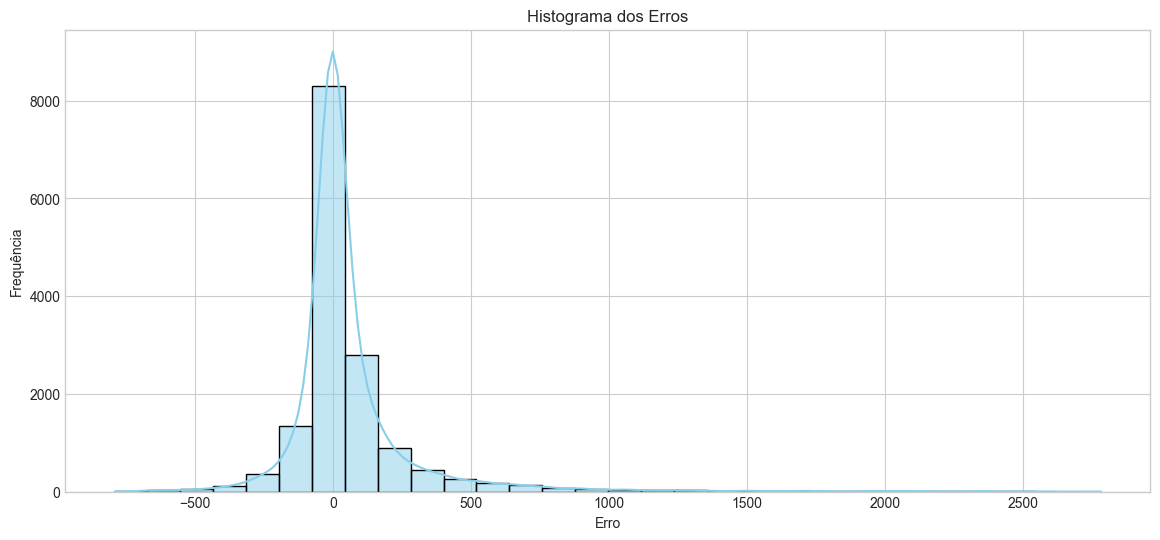

In [262]:
grafico_histograma_erros(y_test_original,y_pred_original)